In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_blobs

In [6]:
data = make_blobs(
    n_samples = 300,
    n_features = 2,
    centers = 2,
    cluster_std=1.0, 
    random_state=101
)

In [19]:
X,y=data

In [ ]:
#lets add new noise as a feature

In [20]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [21]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [22]:
feat = pd.DataFrame(X)

In [23]:
feat= pd.concat([feat,z_noise], axis=1)

In [25]:
feat.columns=["X1","X2","X3"]

In [26]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


<IPython.core.display.Javascript object>


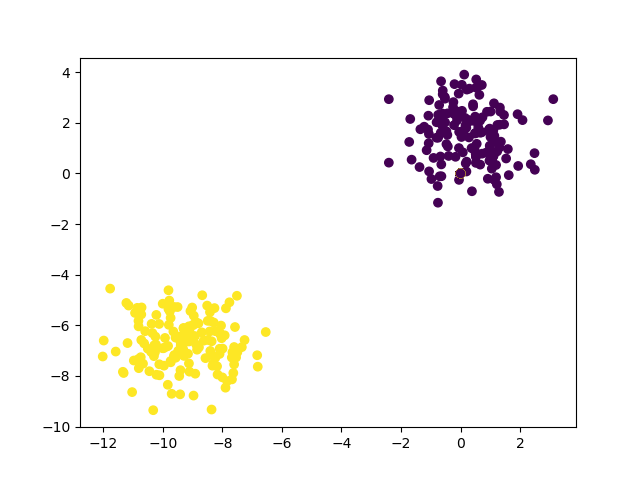

In [35]:
plt.scatter(feat["X1"], feat["X2"], c=y)

In [28]:
#lets see for 3rd feature as well

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [32]:
%matplotlib notebook

<IPython.core.display.Javascript object>


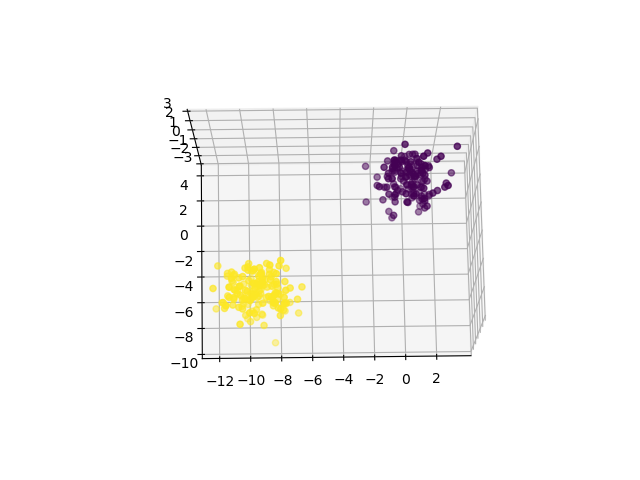

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(feat["X1"], feat["X2"], feat["X3"], c=y)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [60]:
#take input 3 layers -> reduces to 2 and finally back to 3

In [61]:
#3->2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [62]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [63]:
#combined encoder and decoder
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [54]:
#scaled_data

In [66]:
#since our input and desired output are same
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 0s 599us/sample - loss: 0.3350
Epoch 2/5
300/300 [==============================] - 0s 68us/sample - loss: 0.3350
Epoch 3/5
300/300 [==============================] - 0s 53us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 55us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 52us/sample - loss: 0.3350


In [67]:
encoded_2dim = encoder.predict(scaled_data)

In [72]:
#encoded_2dim
%matplotlib notebook

<IPython.core.display.Javascript object>


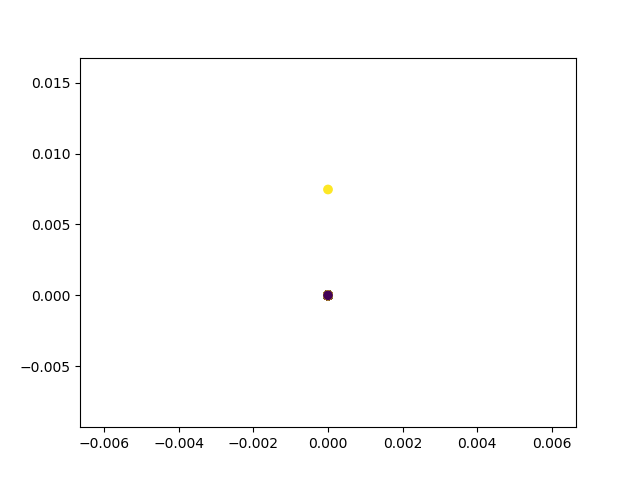

In [73]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)